In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt


(train_input, train_target), (test_input, test_target) = \
    cifar10.load_data()

Using TensorFlow backend.


In [2]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

import numpy as np

print(np.unique(train_target, return_counts=True))

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))


In [3]:
train_scaled = train_input.reshape(-1,32,32,3) / 255.0

In [4]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [5]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(40000, 32, 32, 3) (40000, 1)
(10000, 32, 32, 3) (10000, 1)


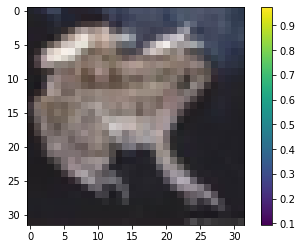

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_scaled[0].reshape(32,32,3), cmap="viridis")
plt.colorbar()
plt.show()

In [7]:
model = keras.Sequential()

In [8]:
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

2022-08-18 18:05:29.519209: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-18 18:05:29.520212: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

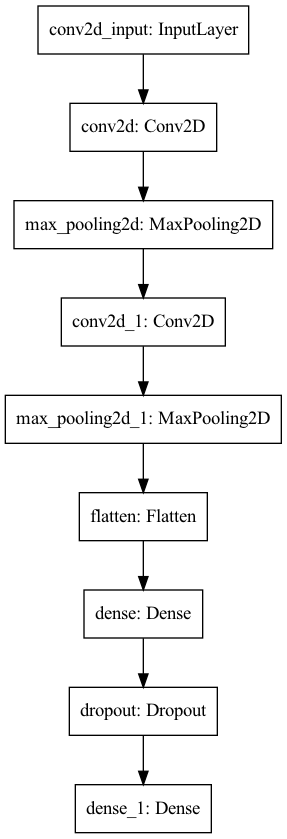

In [10]:
keras.utils.plot_model(model, to_file='model_c.png')

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cifar-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=30, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 223s 6ms/sample - loss: 1.5802 - accuracy: 0.4243 - val_loss: 1.3142 - val_accuracy: 0.5345
Epoch 2/30
40000/40000 [==============================] - 170s 4ms/sample - loss: 1.2343 - accuracy: 0.5614 - val_loss: 1.1138 - val_accuracy: 0.6023
Epoch 3/30
40000/40000 [==============================] - 170s 4ms/sample - loss: 1.0978 - accuracy: 0.6113 - val_loss: 1.0069 - val_accuracy: 0.6460
Epoch 4/30
40000/40000 [==============================] - 176s 4ms/sample - loss: 1.0136 - accuracy: 0.6421 - val_loss: 0.9495 - val_accuracy: 0.6617
Epoch 5/30
40000/40000 [==============================] - 176s 4ms/sample - loss: 0.9461 - accuracy: 0.6649 - val_loss: 0.9138 - val_accuracy: 0.6797
Epoch 6/30
40000/40000 [==============================] - 479s 12ms/sample - loss: 0.8841 - accuracy: 0.6855 - val_loss: 0.9062 - val_accuracy: 0.6764
Epoch 7/30
40000/40000 [=========================

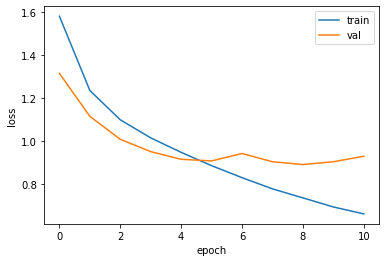

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
model.evaluate(val_scaled, val_target)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8894046339035034, 0.6892]

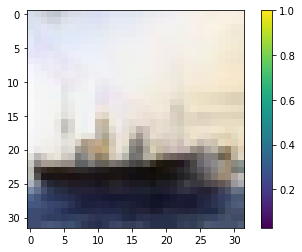

In [14]:
plt.imshow(val_scaled[1].reshape(32,32,3), cmap='viridis')
plt.colorbar()
plt.show()

In [15]:
preds = model.predict(val_scaled[1:2])
print(preds)

[[1.4603271e-03 6.9437397e-06 5.5805231e-07 8.9780369e-06 1.5970716e-07
  1.0692169e-07 2.1979838e-07 2.0053581e-07 9.9740344e-01 1.1190875e-03]]


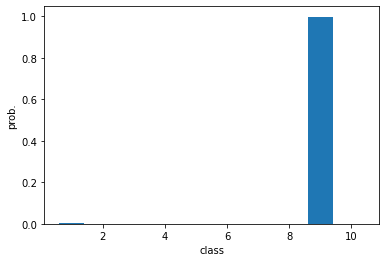

In [16]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes = ['비행기', '자동차', '새', '고양이', '사슴',
           '강아지', '개구리', '말', '배', '트럭']

In [18]:
import numpy as np
print(classes[np.argmax(preds)])

배


In [19]:
test_scaled = test_input.reshape(-1,32,32,3) / 255.0
model.evaluate(test_scaled, test_target)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8995115863800048, 0.6946]